In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score,cohen_kappa_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

In [4]:
data=pd.read_csv("data.csv")
P=data.iloc[:,2:32]

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

B    357
M    212
Name: diagnosis, dtype: int64

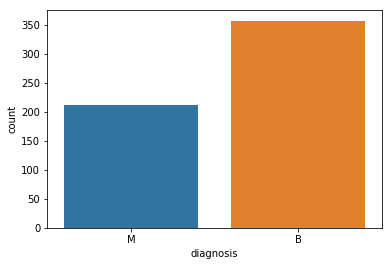

In [15]:
sns.countplot(x="diagnosis", data=data)
data.loc[:,'diagnosis'].value_counts()

In [8]:
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.960255820189289


In [9]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=data.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column


In [10]:
yd=pd.get_dummies(data.diagnosis)
y=yd.M
y.head() # response variable

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [11]:
Xy=pd.DataFrame(np.hstack([P_pca,d.values]),columns=n)
from sklearn.model_selection import train_test_split
#predictor X
X=(Xy.iloc[:,0:11]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


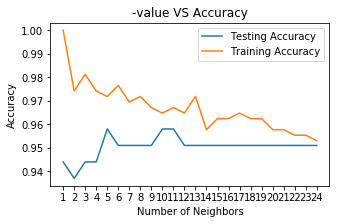

Best accuracy is 0.958041958041958 with K = 5


In [13]:
#Choosing the k-value

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[5,3])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #random_state=0 and change test_size
knn = KNeighborsClassifier(n_neighbors = 5)
t0=time.time()
knn.fit(X_train,y_train)
training_time=round(time.time()-t0,3)
t1=time.time()
prediction = knn.predict(X_test)
prediction_time=round(time.time()-t1,3)
print('With KNN (K=5) accuracy is: ',knn.score(X_test,y_test)) # accuracy

With KNN (K=5) accuracy is:  0.958041958041958


KNN:
 confusion matrix
 [[89  1]
 [ 5 48]] 


Confusion matrix plot of KNN classifier


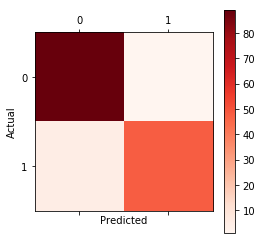


 Classification report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

With KNN (K=5) accuracy is:  0.958041958041958


In [84]:

# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, prediction)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test,prediction))
print('With KNN (K=5) accuracy is: ',knn.score(X_test,y_test)) # accuracy

In [108]:
#import metrics for evaluation

from sklearn.metrics import accuracy_score,cohen_kappa_score, f1_score, recall_score, precision_score

#use builtin functions or use confustion matrix

#[row, column] from confustion matrix
# TP - True positive, TN - True Negative, FP - False Positive, FN - False Negative

TP = c_m[1, 1]
TN = c_m[0, 0]
FP = c_m[0, 1]
FN = c_m[1, 0]

In [17]:
print("Training time: ",training_time, "\nPrediction time: ", prediction_time)

Training time:  0.006 
Prediction time:  0.008


In [110]:
cohen_kappa_score(y_test, prediction, labels=None, weights=None, sample_weight=None)

0.9086456558773424

In [111]:
f1_score(y_test, prediction, labels=None)

0.9411764705882353

In [112]:
#accuracy score - 2 ways (1- using metrics functions or 2-using confusion matrix)

print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, prediction))

0.958041958041958
0.958041958041958


In [113]:
#classification error - 2 ways

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, prediction))

0.04195804195804196
0.04195804195804198


In [114]:
#sensitivity - 2 ways

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, prediction))

0.9056603773584906
0.9056603773584906


In [115]:
#specificity

specificity = TN / (TN + FP)
print(specificity)

0.9888888888888889


In [116]:
#precision

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, prediction))

0.9795918367346939
0.9795918367346939


In [117]:
#false positive rate

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.011111111111111112
0.011111111111111072
